**Dataset Preparation**

> *The cleaned epitope dataset `(Clean_Epitops_data)` was used for binary classification, where Immunogenicity 
was treated as the dependent variable. The target label `(Immunegencity_label)` was encoded as a binary outcome 
`(1 = immunogenic, 0 = non-immunogenic)`.
All remaining columns were treated as independent numerical features.
The dataset was checked for missing values and inconsistencies prior to modeling, ensuring suitability for
supervised machine learning.*

**Train–Test Split**

> *The dataset was divided into training and testing subsets using an 80:20 split, allowing unbiased evaluation of model generalization performance.
`Training set: 80%`
`Testing set: 20%`*


**Classification Models**

> *Five widely used machine learning classifiers were evaluated:     
`Logistic Regression (LR) – baseline linear model`             
`Random Forest Classifier (RF) – ensemble-based, non-linear model`     
`Support Vector Classifier (SVC) – margin-based classifier`     
`Decision Tree Classifier (DT) – rule-based non-linear model`    
`K-Nearest Neighbors (KNN) – distance-based classifier`     
Each model was trained using identical training and testing splits to ensure fair comparison.*


**Performance Metrics**

> *Model performance was evaluated using multiple complementary metrics:          
`Accuracy` – overall classification correctness        
`Precision` – ability to correctly identify immunogenic epitopes        
`Recall (Sensitivity)` – ability to capture all immunogenic samples          
`Confusion Matrix` – detailed classification behavior          
`ROC Curve & AUC` – threshold-independent discriminative ability         
ROC analysis was performed using predicted probabilities, which is the correct and recommended practice for binary classification evaluation.*


**ROC Curve Analysis**

> *Receiver Operating Characteristic (ROC) curves were generated for all models on the same plot to allow direct comparison. The Area Under the Curve (AUC) was used as the primary model selection criterion.*

**Interpretation:     
`AUC ≈ 0.5 -> random performance`    
`AUC > 0.7 -> good discriminative capability`      
Higher AUC → better ability to distinguish immunogenic vs non-immunogenic epitopes**   





**Conclusion**
> *Among the evaluated classifiers, tree-based models demonstrated superior discriminative performance in predicting immunogenic epitopes. ROC–AUC analysis confirmed that non-linear decision boundaries are more appropriate for this dataset, highlighting the importance of ensemble learning methods in epitope immunogenicity prediction.*

> **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc

> **Load Data**

In [13]:
df = pd.read_csv('Clean_Epitopes_data.csv')
df.head()

,start,end,peptide length,peptide index,median binding percentile,ann IC50,ann percentile,Immunegencity_label,Antigeneicity_values,allele_encoded,peptide_encode
0,30,39,10,157,0.59,70.80,0.59,1,1.4789,13,12
1,62,69,8,62,0.13,94.67,0.13,0,0.4419,21,17
2,23,32,10,150,0.50,50.31,0.50,0,0.5510,3,171
3,23,33,11,212,0.22,61.50,0.22,1,0.5264,24,33
4,61,69,9,125,0.02,18.32,0.02,1,0.8794,21,55


In [14]:
df.shape

(231, 11)

In [112]:
df['Immunegencity_label'] # dependent column

0      1
1      0
2      0
3      1
4      1
      ..
226    0
227    1
228    1
229    1
230    1
Name: Immunegencity_label, Length: 231, dtype: int64

In [113]:
df.info() # Data summarize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start                      231 non-null    int64  
 1   end                        231 non-null    int64  
 2   peptide length             231 non-null    int64  
 3   peptide index              231 non-null    int64  
 4   median binding percentile  231 non-null    float64
 5   ann IC50                   231 non-null    float64
 6   ann percentile             231 non-null    float64
 7   Immunegencity_label        231 non-null    int64  
 8   Antigeneicity_values       231 non-null    float64
 9   allele_encoded             231 non-null    int64  
 10  peptide_encode             231 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 20.0 KB


In [114]:
df.isnull().sum() # check null values

start                        0
end                          0
peptide length               0
peptide index                0
median binding percentile    0
ann IC50                     0
ann percentile               0
Immunegencity_label          0
Antigeneicity_values         0
allele_encoded               0
peptide_encode               0
dtype: int64

> **Split Data into Training and Testing**

In [115]:
X = df.drop('Immunegencity_label', axis=1)
y = df['Immunegencity_label']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(184, 10)
(184,)
(47, 10)
(47,)


> **Classification Models**

In [117]:
clf_models = {
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    'Support Vector Classifier(SVR)':SVC(probability=True),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'KNN':KNeighborsClassifier()
}

> **Model Training, Prediction, Metrics**

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Name: Logistic Regression
Accuracy Score: 0.6808510638297872
Precision Score: 0.7222222222222222
Recall Score: 0.5652173913043478
Confusion Metrics:
[[19  5]
 [10 13]]
Model Name: Random Forest Classifier
Accuracy Score: 0.8297872340425532
Precision Score: 0.8571428571428571
Recall Score: 0.782608695652174
Confusion Metrics:
[[21  3]
 [ 5 18]]
Model Name: Support Vector Classifier(SVR)
Accuracy Score: 0.5106382978723404
Precision Score: 0.0
Recall Score: 0.0
Confusion Metrics:
[[24  0]
 [23  0]]
Model Name: Decision Tree Classifier
Accuracy Score: 0.723404255319149
Precision Score: 0.75
Recall Score: 0.6521739130434783
Confusion Metrics:
[[19  5]
 [ 8 15]]
Model Name: KNN
Accuracy Score: 0.7659574468085106
Precision Score: 0.75
Recall Score: 0.782608695652174
Confusion Metrics:
[[18  6]
 [ 5 18]]


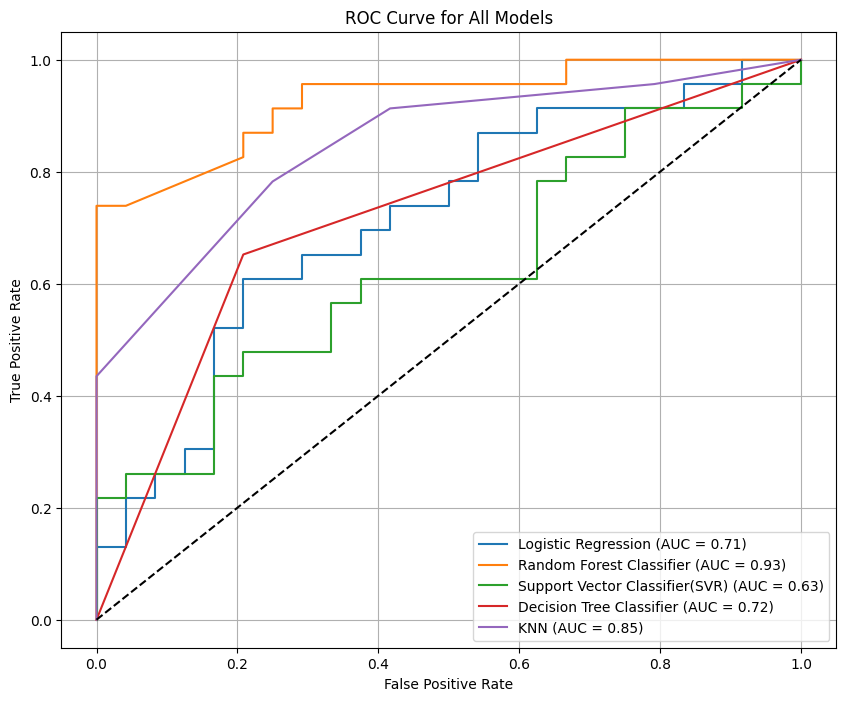

In [118]:
plt.figure(figsize=(10, 8))

for name, model in clf_models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Prediction
    y_prediction = model.predict(X_test)

    #  Metrics
    acc = accuracy_score(y_test, y_prediction)
    ps = precision_score(y_test, y_prediction)
    rs = recall_score(y_test, y_prediction)
    cm = confusion_matrix(y_test, y_prediction)

    # show the result
    print(f"Model Name: {name}")
    print(f"Accuracy Score: {acc}")
    print(f"Precision Score: {ps}")
    print(f"Recall Score: {rs}")
    print(f"Confusion Metrics:\n{cm}")
    print("="*50)

    # ROC 
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()
